# LINEAR REGRESSION - House price prediction
* THIS IS AN ML MODEL FOR PREDICTING THE PRICE OF THE HOUSE WITH A SINGLE FEATURE SIZE AS AN INPUT.
* uSING BATCH WISE GRADIENT DESCENT ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
df = pd.read_csv(R"HOUSE_DATA.CSV")
df.rename(columns={"SalePrice" : "PRICE","Id":"SIZE"},inplace = True)
df

,SIZE,PRICE
0,100,345
1,200,378
2,469,521
3,764,845
4,978,999
5,288,387
6,375,476
7,245,384
8,798,876
9,899,987


In [2]:
x_train = np.array(df.iloc[:,0])
y_train = np.array(df.loc[:,"PRICE"])
m = len(x_train)
print(x_train,"\n",y_train,"\n",m)

[ 100  200  469  764  978  288  375  245  798  899  999  234  576  789
 1020  347] 
 [ 345  378  521  845  999  387  476  384  876  987 1289  324  675  978
 1200  473] 
 16


In [3]:
def linear_model(x,w,b):
    y = np.zeros(m)
    total_cost = 0
    for i in range(m):
        y[i] = w*x[i]+b
        cost = (y[i] - y_train[i])**2
        total_cost += cost/2*m
    return y,total_cost

In [4]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = (1 / (2 * m)) * cost

    return total_cost

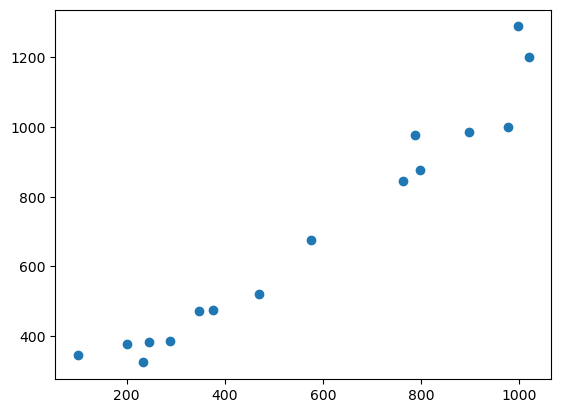

In [5]:
plt.scatter(x_train,y_train)

In [6]:
def compute_gradient(x, y, w, b,A): 
    
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    wl = []
    bl = []
    jl = []
    pl = []

    for j in range(0,20000):#100000
        dj_dw = 0.0
        dj_db = 0.0
        for i in range(0,m):
            f_wb = w * x[i] + b 
            dj_dw += ((f_wb - y[i]) * x[i])
            dj_db += (f_wb - y[i])
        dj_dw = dj_dw/m
        dj_db = dj_db/m
        w = w - (A * dj_dw)
        b = b - (A * dj_db)
        wl.append(w)
        bl.append(b)
        jl.append(dj_dw)
        pl.append([w,b])
        
    return w, b,dj_dw,jl,wl,bl,pl

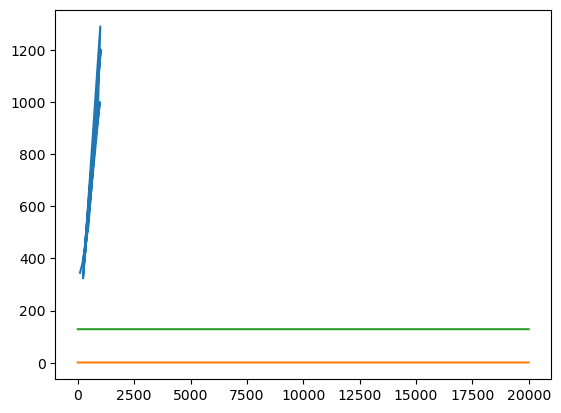

In [7]:
a = y_train - x_train
w_i = 1
b_i = sum(a)/len(a)
w,b,dj_dw,jl,wl,bl,pl = compute_gradient(x_train, y_train,w_i,b_i,0.00000001)#0.00000001
y,t_cost = linear_model(x_train,w,b)
plt.plot(x_train,y_train,pl)
jl,wl,bl = np.array(jl),np.array(wl),np.array(bl)

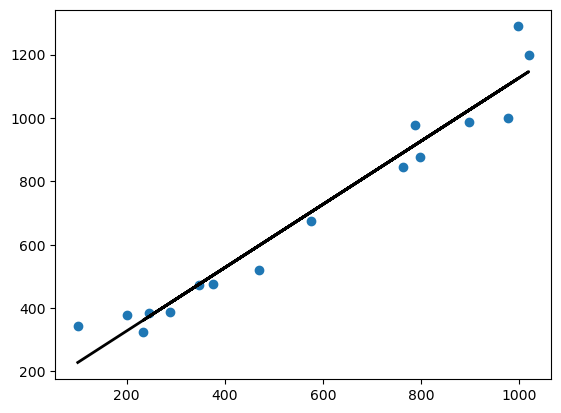

[ 100  200  469  764  978  288  375  245  798  899  999  234  576  789
 1020  347] [ 228.29199702  328.08376053  596.52360436  890.9093067  1104.4636806
  415.90051241  502.71934666  372.9900541   924.83850629 1025.62818743
 1125.41995094  362.01296012  703.30079131  915.85724758 1146.37622128
  474.77765288] 0.9979176350618534 128.50023351404909


In [8]:
plt.plot(x_train,y,color = "k",linewidth=2)
plt.scatter(x_train,y_train,)
# print(wl,bl,jl)
plt.show()
print(x_train,y,w,b)

In [9]:
test = float(input("enter the size of the house: "))
print("predicted price: ",w*test+b)

enter the size of the house: 123
predicted price:  251.24410262665705
